# Problem 8: Fit One Cycle

In [1]:
x = [1, 2, 3, 6, 8, 11, 12, 13, 14, 15]
y = [10, 6, 4, 4, 4, 1, 4, 6, 2, 7]

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from fastai.learner import *

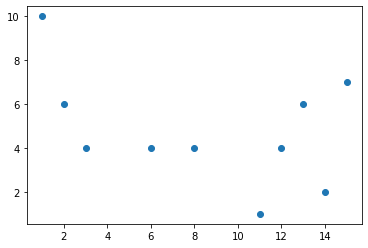

In [3]:
plt.scatter(x, y)

In [4]:
coeffs = np.polyfit(x, y, deg=9)
poly = np.poly1d(coeffs)

In [5]:
x_fit = np.linspace(1, 15, 100)
y_fit = poly(x_fit)

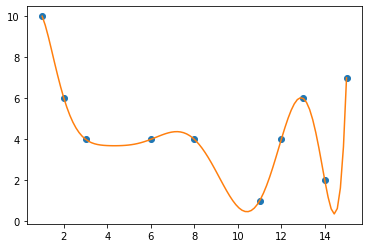

In [6]:
plt.plot(x, y, 'o', x_fit, y_fit)

In [17]:
def p(x):
    deg = 9
    y = 0
    for coeff in coeffs:
        y += (x ** deg) * coeff
        deg -= 1
    return y

In [18]:
import torch

In [19]:
def find_stable_min(x):
    x = torch.tensor(float(x)).requires_grad_()

    for i in range(100):
        loss = p(x)

        lr = 0.1
        if lr == None:
            break

        loss.backward()
        x = (x - x.grad * lr).clone().detach().requires_grad_()
    
    return x

In [20]:
starts = [1, 4, 11, 14, 15]

In [21]:
for point in starts:
    found_min = find_stable_min(point)
    print(f'Minimum, when starting from {point} is: {found_min}')

Minimum, when starting from 1 is: 4.121303558349609
Minimum, when starting from 4 is: 4.238922119140625
Minimum, when starting from 11 is: 10.41992473602295
Minimum, when starting from 14 is: 13.957813262939453
Minimum, when starting from 15 is: 10.421483993530273
